# Dimensionality Reduction

Dimensionality reduction is a key data pre-processing technique. You will perform PCA, a popular dimensionality reduction technique to MNIST data to see how it performs.

In [1]:
%matplotlib inline 

#Array processing
import numpy as np

#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures + statistical figures not in MPL.
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import Image

from sklearn.datasets import fetch_mldata                                                                       
from sklearn.utils import shuffle                                                                                                                                                                      
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC , SVR 
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier                                                       
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV                                                
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pydot, io
import time

#######################End imports###################################


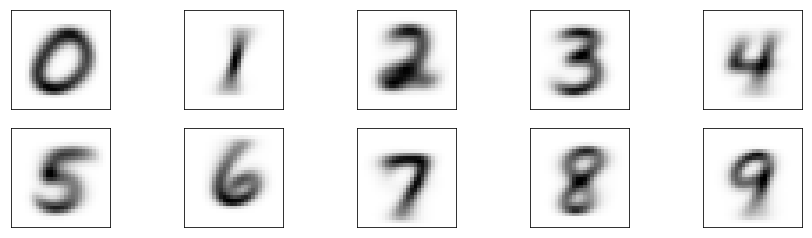

In [2]:
####################Do not change anything below
#Load MNIST data. fetch_mldata will download the dataset and put it in a folder called mldata. 
#Some things to be aware of:
#   The folder mldata will be created in the folder in which you started the notebook
#   So to make your life easy, always start IPython notebook from same folder.
#   Else the following code will keep downloading MNIST data
mnist = fetch_mldata("MNIST original") 
                                                                                                             
#In order to make the experiments repeatable, we will seed the random number generator to a known value
# That way the results of the experiments will always be same
np.random.seed(1234)                        

# Recall that we previously used shuffle and assigned first 5000 data as training and remaining as testing
# Here is another way to do this
# Here we are using a function in cross validation module to split 
# By convention, let us use a 70/30 split
train_data, test_data, train_labels, test_labels = \
        train_test_split(mnist.data, mnist.target, test_size=0.3)

#The images are in grey scale where each number is between 0 to 255
# Now let us normalize them so that the values are between 0 and 1. 
# This will be the only modification we will make to the image
train_data = train_data / 255.0                                        
test_data = test_data / 255.0

# Plot the average value of all digits
plt.figure()
fig,axes = plt.subplots(2, 5, figsize=(15,4))

for i in range(10):
    row, col = i // 5, i%5
    
    #Change below: Subset p3_train_data with images for digit i only 
    # Possible to do it 1 liner (similar to how it is done in Pandas)
    digit_i_subset = train_data[train_labels == i]

    #Change below: compute avg value of t3a_digit_i_subset
    # remember to use a vectorized version of mean for efficiency
    digit_i_subset_mean = np.mean(digit_i_subset, axis=0)

    #Do not change below
    axes[row][col].imshow( digit_i_subset_mean.reshape(28, 28), cmap="Greys") 
    axes[row][col].grid(False)
    axes[row][col].get_xaxis().set_ticks([])
    axes[row][col].get_yaxis().set_ticks([])

### Exercise 7: Dimensionality Reduction (25 marks)

- Task 7a: Train a multi-class classifier (OneVsRest) with LinearSVC class and make predictions and print the training time and classification accuracy on the test set. (5 marks)

- Task 7b: Perform PCA with 100 components on the training data, map both training and test data into 100-dimensional space by PCA, train a multi-class classifier (OneVsRest) with LinearSVC class using the trainformed training data, make predictions and print the training time and the classification accuracy on the test set. (10 marks)

- Task 7c: One way to determine how much components needs for PCA is to find the smallest value such that it explained 95% of the variance. Using the PCA results obtained above, print the cumulative variance that is explained by 100 components. (10 marks)

In [19]:
# Task t7a (5 marks)
# Train a multi-class classifier (OneVsRest) with LinearSVC class and make predictions
# Print the training time and classification accuracy on the test set
# Write your code here

import time

# Recording the start time
training_start_time = time.clock()

one_vs_rest_linear_svc_model = OneVsOneClassifier(LinearSVC(random_state=0)).fit(train_data, train_labels)

# Recording the end time
training_end_time = time.clock()


In [20]:
print("Time taken to train {0:0.2f} seconds.".format(training_end_time - training_start_time))

Time taken to train 26.92 seconds.


In [24]:
accuracy = one_vs_rest_linear_svc_model.score(test_data, test_labels)
print("Accuracy of the classifier: {0:0.2f} %".format(accuracy * 100))

Accuracy of the classifier: 92.86 %


In [27]:
# Task t7b (10 marks)
# Perform PCA on the training data and map both training and test data into 100-dimensional space by PCA, 
# Train a multi-class classifier (OneVsRest) with LinearSVC class using the trainformed training data,
# Print the training time and classification accuracy on the test set
# Remember that MNIST images are 28x28 => 784 features.

# You might want to check http://scikit-learn.org/stable/modules/decomposition.html#decompositions for details
# Write your code below

'''
n_components = 16
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

X_train_pca = pca.transform(X_train)

'''

N_COMPONENTS = 100

pca = PCA(n_components = N_COMPONENTS).fit(train_data)

In [29]:
train_data_pca = pca.transform(train_data)
test_data_pca = pca.transform(test_data)

In [33]:
# Recording the start time
training_start_time = time.clock()

pca_one_vs_rest_linear_svc_model = OneVsOneClassifier(LinearSVC(random_state=0)).fit(train_data_pca, train_labels)

# Recording the end time
training_end_time = time.clock()


In [34]:
print("Time taken to train {0:0.2f} seconds.".format(training_end_time - training_start_time))

Time taken to train 15.24 seconds.


In [35]:
accuracy = pca_one_vs_rest_linear_svc_model.score(test_data_pca, test_labels)
print("Accuracy of the classifier: {0:0.2f} %".format(accuracy * 100))

Accuracy of the classifier: 93.80 %


(array([31., 15., 10.,  6.,  4.,  4.,  2.,  3.,  3.,  1.,  1.,  2.,  2.,
         0.,  1.,  1.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00095092, 0.00191229, 0.00287365, 0.00383502, 0.00479638,
        0.00575774, 0.00671911, 0.00768047, 0.00864184, 0.0096032 ,
        0.01056456, 0.01152593, 0.01248729, 0.01344866, 0.01441002,
        0.01537139, 0.01633275, 0.01729411, 0.01825548, 0.01921684,
        0.02017821, 0.02113957, 0.02210093, 0.0230623 , 0.02402366,
        0.02498503, 0.02594639, 0.02690775, 0.02786912, 0.02883048,
        0.02979185, 0.0307

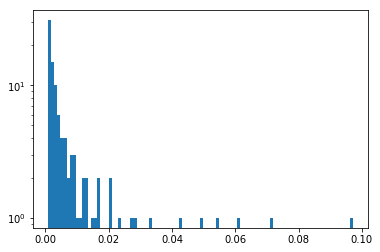

In [37]:
# Task t7c (10 marks)

# One way to determine how much components needs for PCA is to find the smallest value 
# such that it explained 95% of the variance. 
# Using the PCA results obtained above, print the cumulative variance that is explained 
# by 100 components.
# Write your code below
plt.hist(pca.explained_variance_ratio_, bins=N_COMPONENTS, log=True)

In [38]:
pca.explained_variance_ratio_.sum()

0.914667513651581